# Load 

In [1]:
import pandas as pd
import networkx as nx
from collections import Counter, defaultdict
import numpy as np
from scipy.stats import mannwhitneyu
from itertools import combinations, permutations
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
G = nx.read_gpickle("data/G_analysisready_03.pkl")

In [3]:
performers = [x for x in G.nodes() if G.node[x]['bipartite'] == 0]
fp = []

for p in performers:
    if 'a_pcat' in G.node[p]:
        if G.node[p]['a_pcat'] in ['f_gay', 'f_straight']:
            if 'unknown' not in p:
                fp.append(p)

# Table 1: Counts

In [4]:
total = len(fp)
out = [('all', total, 100, 0, 0, 0)]
out = pd.DataFrame(out, columns=['feature', 'count', '%total', '%subset', '%titles', '%titlegain'])

In [5]:
feature = 'b_ethnicity'
p_c = Counter()
for x in fp:
    f = G.node[x][feature]
    if pd.notnull(f):
        p_c.update([feature])
        if len(f) > 1:
            p_c.update(['multiple'])
        else:
            p_c.update(f)
        
t_c = defaultdict(list)
for x in fp:
    f = G.node[x][feature]
    if pd.notnull(f):
        nei = G.neighbors(x)
        t_c[feature] += list(set(nei))
        if len(f) > 1:
            t_c['multiple'] += list(set(nei))
        else:
            t_c[f[0]] += list(set(nei))

thisout = []
for k, v in p_c.most_common():
    this = [k, v, (v/total)*100, (v/p_c[feature])*100, (len(set(t_c[k]))/len(set(t_c[feature])))*100]
    this.append(this[-1] - this[-2])
    thisout.append(this)
thisout = pd.DataFrame(thisout, columns=['feature', 'count', '%total', '%subset', '%titles', '%titlegain'])
out = pd.concat([out, thisout])

In [6]:
feature = 'b_haircolor'
p_c = Counter()
for x in fp:
    f = G.node[x][feature]
    if pd.notnull(f):
        p_c.update([feature])
        if len(f) > 1:
            p_c.update(['multiple'])
        else:
            p_c.update(f)
        
t_c = defaultdict(list)
for x in fp:
    f = G.node[x][feature]
    if pd.notnull(f):
        nei = G.neighbors(x)
        t_c[feature] += list(set(nei))
        if len(f) > 1:
            t_c['multiple'] += list(set(nei))
        else:
            t_c[f[0]] += list(set(nei))

thisout = []
for k, v in p_c.most_common():
    this = [k, v, (v/total)*100, (v/p_c[feature])*100, (len(set(t_c[k]))/len(set(t_c[feature])))*100]
    this.append(this[-1] - this[-2])
    thisout.append(this)
thisout = pd.DataFrame(thisout, columns=['feature', 'count', '%total', '%subset', '%titles', '%titlegain'])
out = pd.concat([out, thisout])

In [7]:
feature = 'b_cup'
p_c = Counter()
for x in fp:
    f = G.node[x][feature]
    if pd.notnull(f):
        p_c.update([feature])
        p_c.update(f)

t_c = defaultdict(list)
for x in fp:
    f = G.node[x][feature]
    if pd.notnull(f):
        nei = G.neighbors(x)
        t_c[feature] += nei
        for y in f:
            t_c[y] += nei

thisout = []
for k, v in p_c.most_common():
    this = [k, v, (v/total)*100, (v/p_c[feature])*100, (len(set(t_c[k]))/len(set(t_c[feature])))*100]
    this.append(this[-1] - this[-2])
    thisout.append(this)
thisout = pd.DataFrame(thisout, columns=['feature', 'count', '%total', '%subset', '%titles', '%titlegain'])
thisout = thisout.sort_values(by='feature')
out = pd.concat([out, thisout])

In [8]:
out.round(2)

,feature,count,%total,%subset,%titles,%titlegain
0,all,46320,100.00,0.00,0.00,0.00
0,b_ethnicity,35368,76.36,100.00,100.00,0.00
1,caucasian,24806,53.55,70.14,87.45,17.31
2,black,4276,9.23,12.09,12.40,0.31
3,latin,3855,8.32,10.90,21.79,10.89
4,asian,1720,3.71,4.86,11.38,6.52
5,multiple,711,1.53,2.01,13.45,11.44
0,b_haircolor,34952,75.46,100.00,100.00,0.00
1,brown,11784,25.44,33.71,62.08,28.37
2,blond,10365,22.38,29.65,63.31,33.65


# Accolades

In [9]:
for x in fp:
    G.node[x]['b_awards'] = None
    out = []
    a = G.node[x]['awards']
    if pd.notnull(a):
        for v in a.values():
            for b in v:
                if 'Nominee' in b:
                    out.append('nominated')
                if 'Winner' in b:
                    out.append('won')
    if out:
        G.node[x]['b_awards'] = out

In [10]:
with_acc = [x for x in fp if G.node[x]['b_awards']]
with_acc = list(set(with_acc))
with_win = []
for x in with_acc:
    if 'won' in G.node[x]['b_awards']:
        with_win.append(x)
with_win = list(set(with_win))
with_nom = []
for x in with_acc:
    if 'nominated' in G.node[x]['b_awards']:
        with_nom.append(x)
with_nom = list(set(with_nom))
print("with acc", len(with_acc), np.round((len(with_acc)/total)*100, 2))
print("with nom", len(with_nom), np.round((len(with_nom)/total)*100, 2))
print("with win", len(with_win), np.round((len(with_win)/total)*100, 2))

with acc 1430 3.09
with nom 1326 2.86
with win 348 0.75


In [11]:
t_c = defaultdict(list)

for x in fp:
    t_c['all'] += G.neighbors(x)
    f = G.node[x]['b_awards']
    if f:
        nei = G.neighbors(x)
        t_c['acc'] += nei
        if 'nominated' in f:
            t_c['nom'] += nei
        if 'won' in f:
            t_c['won'] += nei
for k, v in t_c.items():
    print(k, len(set(v)))
    
for k, v in t_c.items():
    n = len(set(v))
    d = len(set(t_c['all']))
    prop = n/d
    per = prop * 100
    print(k, np.round(per, 2))

nom 59561
acc 63747
all 122269
won 31974
nom 48.71
acc 52.14
all 100.0
won 26.15


# Table 2: Averages

In [12]:
for f in ['proc_height', 'proc_weight', 'proc_bust', 'proc_waist', 'proc_hip']:
    v = []
    for x in fp:
        if pd.notnull(G.node[x][f]):
            add = G.node[x][f]
            if f in ['proc_bust', 'proc_waist', 'proc_hip']:
                add = add * 2.54
            v.append(add)
    print(f, len(v), np.round(len(v)/total*100, 2), np.round(np.mean(v), 2), np.round(np.std(v), 2))
    

proc_height 9771 21.09 165.23 6.87
proc_weight 7769 16.77 54.59 8.58
proc_bust 8713 18.81 88.18 7.94
proc_waist 7746 16.72 64.45 7.08
proc_hip 7734 16.7 89.4 8.04


# Fig 1: Title Distribution; Ethnicity

In [13]:
import powerlaw

Do we want "exclusive", or "has"?

In [14]:
d = defaultdict(list)
f = 'b_ethnicity'
for x in performers:
    deg = G.degree(x)
    #d['performers'].append(deg)
    if x in fp:
        d['fp'].append(deg)
        tf = G.node[x][f]
        if pd.notnull(tf):
            if len(tf) > 1:
                d['multiple'].append(deg)
            else:
                d[tf[0]].append(deg)

In [15]:
fit_d = {}
for k, v in d.items():
    fit_d[k] = powerlaw.Fit(v, discrete=True, xmin=1)

/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [16]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [17]:
plt.clf()
plt.cla()
ax = fit_d['fp'].plot_ccdf(color='k', linewidth=4, label='All')
fit_d['caucasian'].plot_ccdf(color='b', linewidth=2, linestyle='--', ax=ax, label='Caucasian')
fit_d['latin'].plot_ccdf(color='g', linewidth=2, linestyle='--', ax=ax, label='Latina')
fit_d['black'].plot_ccdf(color='c', linewidth=2, linestyle='--', ax=ax, label='Black')
fit_d['asian'].plot_ccdf(color='m', linewidth=2, linestyle='--', ax=ax, label='Asian')
fit_d['multiple'].plot_ccdf(color='y', linewidth=2, linestyle='--', ax=ax, label='Multiple')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(x, ",")))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_xlabel(r"$x$: Number of Titles")
ax.set_ylabel(r"$p(X \geq x)$")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6.5, 4.5)
#plt.show()
plt.savefig('distribution_ccdf.png', dpi=1200)

# Truncated Power Law estimates

In [18]:
l = ['fp', 'caucasian', 'black', 'latin', 'asian', 'multiple']

for k in l:
    v = fit_d[k]
    print(k, np.round(v.truncated_power_law.parameter1, 4), np.round(v.truncated_power_law.parameter2, 4))

/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


fp 1.5008 0.0037
caucasian 1.2772 0.0062
black 1.4868 0.0077
latin 1.4856 0.0049
asian 1.5911 0.0022
multiple 1.1845 0.004


In [19]:
d = defaultdict(list)
f = 'b_haircolor'
for x in performers:
    deg = G.degree(x)
    #d['performers'].append(deg)
    if x in fp:
        tf = G.node[x][f]
        if pd.notnull(tf):
            if len(tf) > 1:
                d['multiple'].append(deg)
            else:
                d[tf[0]].append(deg)
fit_d = {}
for k, v in d.items():
    fit_d[k] = powerlaw.Fit(v, discrete=True, xmin=1)
l = ['brown', 'blond', 'black', 'red', 'multiple']

for k in l:
    v = fit_d[k]
    print(k, np.round(v.truncated_power_law.parameter1, 4), np.round(v.truncated_power_law.parameter2, 4))

/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


brown 1.4106 0.0061
blond 1.3074 0.0066
black 1.4974 0.0055
red 1.4076 0.0103
multiple 1.0 0.0046


In [20]:
d = defaultdict(list)
f = 'b_cup'
for x in performers:
    deg = G.degree(x)
    #d['performers'].append(deg)
    if x in fp:
        tf = G.node[x][f]
        if pd.notnull(tf):
            d['b_cup'].append(deg)
            d[tf[0]].append(deg)
fit_d = {}
for k, v in d.items():
    fit_d[k] = powerlaw.Fit(v, discrete=True, xmin=10)
l = ['A', 'B', 'C', 'D', 'E', '> E']

for k in l:
    v = fit_d[k]
    print(k, np.round(v.truncated_power_law.parameter1, 4), np.round(v.truncated_power_law.parameter2, 4))

/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


A 1.016 0.0082
B 1.0 0.0068
C 1.0 0.0055
D 1.0 0.0141
E 1.0 0.0055
> E 1.1019 0.0079


# Win/Nom comparison

In [21]:
top = set(with_acc)
bottom = set(fp) - top

In [22]:
f = 'b_ethnicity'
eths = set()
for x in fp:
    if pd.notnull(G.node[x][f]):
        eths.update(G.node[x][f])
eths

{'asian', 'black', 'caucasian', 'latin'}

In [23]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import margins

def stdres(observed, expected):
    n = observed.sum()
    rsum, csum = margins(observed)
    v = csum * rsum * (n - rsum) * (n - csum) / n**3
    return (observed - expected) / np.sqrt(v)

out = []

f = 'b_ethnicity'
eths = set()
for x in fp:
    if pd.notnull(G.node[x][f]):
        eths.update(G.node[x][f])

for eth in eths:
    m = np.zeros((2, 2))
    for x in top:
        this = G.node[x][f]
        if this:
            if eth in this:
                m[0, 0] += 1
            else:
                m[1, 0] += 1
                
    for x in bottom:
        this = G.node[x][f]
        if this:
            if eth in this:
                m[0, 1] += 1
            else:
                m[1, 1] += 1
    print(eth)
    print(m)
    N = m.sum().sum()
    chi2, p, dof, ex = chi2_contingency(m, correction=False)
    phi = (m[1, 1]*m[0, 0] - m[1, 0]*m[0, 1])/np.sqrt(m[1, :].sum() * m[0, :].sum() * m[:, 0].sum() * m[:, 1].sum())
    zm = m.copy()
    if m[0, 0] > m[1, 0]:
        zm = m[[1, 0]].copy()
    pr1 = zm[0, :].sum()/zm.sum().sum()
    pr2 = zm[1, :].sum()/zm.sum().sum()
    pc1 = zm[:, 0].sum()/zm.sum().sum()
    pc2 = zm[:, 1].sum()/zm.sum().sum()
    maxphi = np.sqrt((pr1 * (1-pc2))/(pc2 * (1-pr1)))
    if phi < 0:
        maxphi = -maxphi
    sr = stdres(m, ex)
    sr = sr[0, 0]
    oddsratio = (m[0,0]/m[0, 1])/(m[1, 0]/m[1, 1])
    lor = np.log(oddsratio)
    clef = (m[0,0]/m[0, :].sum()) * (m[1, 1]/m[1, :].sum())
    out.append([eth, chi2, p, phi, maxphi, sr, oddsratio, lor, clef])

latin
[[   131.   4345.]
 [  1241.  29651.]]
black
[[    99.   4359.]
 [  1273.  29637.]]
caucasian
[[  1147.  24168.]
 [   225.   9828.]]
asian
[[    62.   1777.]
 [  1310.  32219.]]


In [24]:
df = pd.DataFrame(out, columns=['category', 'chi2', 'p', 'phi', 'max_phi', 'adjusted_residual', 'oddsratio', 'logoddsratio', 'CLEF'])
df

,category,chi2,p,phi,max_phi,adjusted_residual,oddsratio,logoddsratio,CLEF
0,latin,12.468575,4.138558e-04,-0.018776,-0.076469,-3.531087,0.720359,-0.328005,0.028091
1,black,37.628273,8.559479e-10,-0.032618,-0.076293,-6.134189,0.528755,-0.637231,0.021293
2,caucasian,101.443488,7.353161e-24,0.053556,0.126597,10.071916,2.073029,0.729011,0.044295
3,asian,1.341598,2.467524e-01,-0.006159,-0.047048,-1.158274,0.858114,-0.153018,0.032397


In [25]:
f = 'b_haircolor'
eths = set()
for x in fp:
    if pd.notnull(G.node[x][f]):
        eths.update(G.node[x][f])
eths

out = []

for eth in eths:
    m = np.zeros((2, 2))
    for x in top:
        this = G.node[x][f]
        if this:
            if eth in this:
                m[0, 0] += 1
            else:
                m[1, 0] += 1
                
    for x in bottom:
        this = G.node[x][f]
        if this:
            if eth in this:
                m[0, 1] += 1
            else:
                m[1, 1] += 1
    print(eth)
    print(m)
    N = m.sum().sum()
    chi2, p, dof, ex = chi2_contingency(m, correction=False)
    phi = (m[1, 1]*m[0, 0] - m[1, 0]*m[0, 1])/np.sqrt(m[1, :].sum() * m[0, :].sum() * m[:, 0].sum() * m[:, 1].sum())
    zm = m.copy()
    if m[0, 0] > m[1, 0]:
        zm = m[[1, 0]].copy()
    pr1 = zm[0, :].sum()/zm.sum().sum()
    pr2 = zm[1, :].sum()/zm.sum().sum()
    pc1 = zm[:, 0].sum()/zm.sum().sum()
    pc2 = zm[:, 1].sum()/zm.sum().sum()
    maxphi = np.sqrt((pr1 * (1-pc2))/(pc2 * (1-pr1)))
    if phi < 0:
        maxphi = -maxphi
    sr = stdres(m, ex)
    sr = sr[0, 0]
    oddsratio = (m[0,0]/m[0, 1])/(m[1, 0]/m[1, 1])
    lor = np.log(oddsratio)
    clef = (m[0,0]/m[0, :].sum()) * (m[1, 1]/m[1, :].sum())
    out.append([eth, chi2, p, phi, maxphi, sr, oddsratio, lor, clef])

red
[[   194.   2798.]
 [  1215.  30745.]]
brown
[[   708.  14141.]
 [   701.  19402.]]
black
[[   350.   8532.]
 [  1059.  25011.]]
blond
[[   625.  11792.]
 [   784.  21751.]]


In [26]:
df = pd.DataFrame(out, columns=['category', 'chi2', 'p', 'phi', 'max_phi', 'adjusted_residual', 'oddsratio', 'logoddsratio', 'CLEF'])
df[['category', 'chi2', 'oddsratio', 'logoddsratio', 'p']]

,category,chi2,oddsratio,logoddsratio,p
0,red,50.880570,1.754495,0.562181,9.816048e-13
1,brown,36.223108,1.385740,0.326234,1.759715e-09
2,black,0.253152,0.968841,-0.031655,6.148643e-01
3,blond,49.998040,1.470468,0.385581,1.538996e-12


In [27]:
f = 'b_cup'
eths = set()
for x in fp:
    if pd.notnull(G.node[x][f]):
        eths.update(G.node[x][f])
eths

out = []

for eth in eths:
    m = np.zeros((2, 2))
    for x in top:
        this = G.node[x][f]
        if this:
            if eth in this:
                m[0, 0] += 1
            else:
                m[1, 0] += 1
                
    for x in bottom:
        this = G.node[x][f]
        if this:
            if eth in this:
                m[0, 1] += 1
            else:
                m[1, 1] += 1
    print(eth)
    print(m)
    N = m.sum().sum()
    chi2, p, dof, ex = chi2_contingency(m, correction=False)
    phi = (m[1, 1]*m[0, 0] - m[1, 0]*m[0, 1])/np.sqrt(m[1, :].sum() * m[0, :].sum() * m[:, 0].sum() * m[:, 1].sum())
    zm = m.copy()
    if m[0, 0] > m[1, 0]:
        zm = m[[1, 0]].copy()
    pr1 = zm[0, :].sum()/zm.sum().sum()
    pr2 = zm[1, :].sum()/zm.sum().sum()
    pc1 = zm[:, 0].sum()/zm.sum().sum()
    pc2 = zm[:, 1].sum()/zm.sum().sum()
    maxphi = np.sqrt((pr1 * (1-pc2))/(pc2 * (1-pr1)))
    if phi < 0:
        maxphi = -maxphi
    sr = stdres(m, ex)
    sr = sr[0, 0]
    oddsratio = (m[0,0]/m[0, 1])/(m[1, 0]/m[1, 1])
    lor = np.log(oddsratio)
    clef = (m[0,0]/m[0, :].sum()) * (m[1, 1]/m[1, :].sum())
    out.append([eth, chi2, p, phi, maxphi, sr, oddsratio, lor, clef])

A
[[  108.   766.]
 [ 1102.  6134.]]
D
[[  270.  1124.]
 [  940.  5776.]]
B
[[  329.  2157.]
 [  881.  4743.]]
> E
[[   77.   423.]
 [ 1133.  6477.]]
E
[[  150.   859.]
 [ 1060.  6041.]]
C
[[  276.  1571.]
 [  934.  5329.]]


In [28]:
df = pd.DataFrame(out, columns=['category', 'chi2', 'p', 'phi', 'max_phi', 'adjusted_residual', 'oddsratio', 'logoddsratio', 'CLEF'])
df[['category', 'chi2', 'oddsratio', 'logoddsratio', 'p']].sort_values(by='category')

,category,chi2,oddsratio,logoddsratio,p
3,> E,0.096775,1.040625,0.039822,7.557345e-01
0,A,5.068682,0.784797,-0.242331,2.436190e-02
2,B,8.025380,0.821151,-0.197048,4.612634e-03
5,C,0.001023,1.002378,0.002376,9.744871e-01
1,D,26.247009,1.476035,0.389360,3.004197e-07
4,E,0.002613,0.995179,-0.004833,9.592335e-01


## 1 vs. 1

In [29]:
fset = set(['caucasian', 'black', 'latin', 'asian', 'multiple'])
fset.add('multiple')
fset

{'asian', 'black', 'caucasian', 'latin', 'multiple'}

In [30]:
out=[]
for a, b in permutations(fset, 2):
    m = np.zeros((2, 2))
    for x in top:
        this = G.node[x][f]
        if pd.notnull(this):
            if len(this) == 1:
                if (a, ) == this:
                    m[0, 0] += 1
                elif (b, ) == this:
                    m[1, 0] += 1
            else:
                if a == 'multiple':
                    m[0, 0] += 1
                elif b == 'multiple':
                    m[1, 0] += 1

    for x in bottom:
        this = G.node[x][f]
        if pd.notnull(this):
            if len(this) == 1:
                if (a, ) == this:
                    m[0, 1] += 1
                elif (b, ) == this:
                    m[1, 1] += 1
            else:
                if a == 'multiple':
                    m[0, 1] += 1
                elif b == 'multiple':
                    m[1, 1] += 1
    thisn = m[0, :].sum()
    N = m.sum().sum()
    chi2, p, dof, ex = chi2_contingency(m, correction=False)
    phi = (m[1, 1]*m[0, 0] - m[1, 0]*m[0, 1])/np.sqrt(m[1, :].sum() * m[0, :].sum() * m[:, 0].sum() * m[:, 1].sum())
    zm = m.copy()
    if m[0, 0] > m[1, 0]:
        zm = m[[1, 0]].copy()
    pr1 = zm[0, :].sum()/zm.sum().sum()
    pr2 = zm[1, :].sum()/zm.sum().sum()
    pc1 = zm[:, 0].sum()/zm.sum().sum()
    pc2 = zm[:, 1].sum()/zm.sum().sum()
    maxphi = np.sqrt((pr1 * (1-pc2))/(pc2 * (1-pr1)))
    if phi < 0:
        maxphi = -maxphi
    sr = stdres(m, ex)
    sr = sr[0, 0]
    oddsratio = (m[0,0]/m[0, 1])/(m[1, 0]/m[1, 1])
    lor = np.log(oddsratio)
    clef = (m[0,0]/m[0, :].sum()) * (m[1, 1]/m[1, :].sum())
    out.append([(a, b), int(thisn), chi2, p, phi, maxphi, sr, oddsratio, lor, clef])

/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/scipy/stats/contingency.py:107: RuntimeWarning: invalid value encountered in true_divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)
/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/vqmalic/projects/iafd_analysis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in doubl

In [31]:
out = pd.DataFrame(out, columns=['comp', 'n', 'chi2', 'p', 'phi', 'maxphi', 'sr', 'oddsratio', 'lor', 'clef'])
out

,comp,n,chi2,p,phi,maxphi,sr,oddsratio,lor,clef
0,"(latin, black)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(latin, caucasian)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(latin, multiple)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(latin, asian)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(black, latin)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"(black, caucasian)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"(black, multiple)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"(black, asian)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(caucasian, latin)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"(caucasian, black)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
m = np.zeros((len(fset), len(fset)))
m = pd.DataFrame(m, columns=fset)
m.index = fset
for _, row in out.iterrows():
    a, b = row['comp'][0], row['comp'][1]
    m.loc[a, b] = row['lor']
m = m.loc[['caucasian', 'black', 'latin', 'asian', 'multiple'], ['caucasian', 'black', 'latin', 'asian', 'multiple']]
m.round(2)

,caucasian,black,latin,asian,multiple
caucasian,0.0,NaN,NaN,NaN,NaN
black,NaN,0.0,NaN,NaN,NaN
latin,NaN,NaN,0.0,NaN,NaN
asian,NaN,NaN,NaN,0.0,NaN
multiple,NaN,NaN,NaN,NaN,0.0


## hair color

In [33]:
f = 'b_haircolor'
fset = set()
for x in fp:
    if pd.notnull(G.node[x][f]):
        fset.update(G.node[x][f])
fset.add('multiple')
fset

{'black', 'blond', 'brown', 'multiple', 'red'}

In [34]:
out=[]
for a, b in permutations(fset, 2):
    m = np.zeros((2, 2))
    for x in top:
        this = G.node[x][f]
        if pd.notnull(this):
            if len(this) == 1:
                if (a, ) == this:
                    m[0, 0] += 1
                elif (b, ) == this:
                    m[1, 0] += 1
            else:
                if a == 'multiple':
                    m[0, 0] += 1
                elif b == 'multiple':
                    m[1, 0] += 1

    for x in bottom:
        this = G.node[x][f]
        if pd.notnull(this):
            if len(this) == 1:
                if (a, ) == this:
                    m[0, 1] += 1
                elif (b, ) == this:
                    m[1, 1] += 1
            else:
                if a == 'multiple':
                    m[0, 1] += 1
                elif b == 'multiple':
                    m[1, 1] += 1
    thisn = m[0, :].sum()
    N = m.sum().sum()
    chi2, p, dof, ex = chi2_contingency(m, correction=False)
    phi = (m[1, 1]*m[0, 0] - m[1, 0]*m[0, 1])/np.sqrt(m[1, :].sum() * m[0, :].sum() * m[:, 0].sum() * m[:, 1].sum())
    zm = m.copy()
    if m[0, 0] > m[1, 0]:
        zm = m[[1, 0]].copy()
    pr1 = zm[0, :].sum()/zm.sum().sum()
    pr2 = zm[1, :].sum()/zm.sum().sum()
    pc1 = zm[:, 0].sum()/zm.sum().sum()
    pc2 = zm[:, 1].sum()/zm.sum().sum()
    maxphi = np.sqrt((pr1 * (1-pc2))/(pc2 * (1-pr1)))
    if phi < 0:
        maxphi = -maxphi
    sr = stdres(m, ex)
    sr = sr[0, 0]
    oddsratio = (m[0,0]/m[0, 1])/(m[1, 0]/m[1, 1])
    lor = np.log(oddsratio)
    clef = (m[0,0]/m[0, :].sum()) * (m[1, 1]/m[1, :].sum())
    out.append([(a, b), int(thisn), chi2, p, phi, maxphi, sr, oddsratio, lor, clef])

In [35]:
out = pd.DataFrame(out, columns=['comp', 'n', 'chi2', 'p', 'phi', 'maxphi', 'sr', 'oddsratio', 'lor', 'clef'])

In [36]:
m = np.zeros((len(fset), len(fset)))
m = pd.DataFrame(m, columns=fset)
m.index = fset
for _, row in out.iterrows():
    a, b = row['comp'][0], row['comp'][1]
    s = np.round(row['lor'], 2)
    s = str(s)
    if row['p'] <= 0.0025:
        s += "*"
    m.loc[a, b] = s


In [37]:
m.loc[['brown', 'blond', 'black', 'red', 'multiple'], ['brown', 'blond', 'black', 'red', 'multiple']]

,brown,blond,black,red,multiple
brown,0,-0.18,0.27,-0.13,-1.25*
blond,0.18,0,0.45*,0.05,-1.07*
black,-0.27,-0.45*,0,-0.39,-1.51*
red,0.13,-0.05,0.39,0,-1.12*
multiple,1.25*,1.07*,1.51*,1.12*,0


In [38]:
f = 'b_cup'
fset = set()
for x in fp:
    if pd.notnull(G.node[x][f]):
        fset.update(G.node[x][f])
fset

{'> E', 'A', 'B', 'C', 'D', 'E'}

In [39]:
out=[]
for a, b in permutations(fset, 2):
    m = np.zeros((2, 2))
    for x in top:
        this = G.node[x][f]
        if pd.notnull(this):
            if len(this) == 1:
                if (a, ) == this:
                    m[0, 0] += 1
                elif (b, ) == this:
                    m[1, 0] += 1
            else:
                if a == 'multiple':
                    m[0, 0] += 1
                elif b == 'multiple':
                    m[1, 0] += 1

    for x in bottom:
        this = G.node[x][f]
        if pd.notnull(this):
            if len(this) == 1:
                if (a, ) == this:
                    m[0, 1] += 1
                elif (b, ) == this:
                    m[1, 1] += 1
            else:
                if a == 'multiple':
                    m[0, 1] += 1
                elif b == 'multiple':
                    m[1, 1] += 1
    thisn = m[0, :].sum()
    N = m.sum().sum()
    chi2, p, dof, ex = chi2_contingency(m, correction=False)
    phi = (m[1, 1]*m[0, 0] - m[1, 0]*m[0, 1])/np.sqrt(m[1, :].sum() * m[0, :].sum() * m[:, 0].sum() * m[:, 1].sum())
    zm = m.copy()
    if m[0, 0] > m[1, 0]:
        zm = m[[1, 0]].copy()
    pr1 = zm[0, :].sum()/zm.sum().sum()
    pr2 = zm[1, :].sum()/zm.sum().sum()
    pc1 = zm[:, 0].sum()/zm.sum().sum()
    pc2 = zm[:, 1].sum()/zm.sum().sum()
    maxphi = np.sqrt((pr1 * (1-pc2))/(pc2 * (1-pr1)))
    if phi < 0:
        maxphi = -maxphi
    sr = stdres(m, ex)
    sr = sr[0, 0]
    oddsratio = (m[0,0]/m[0, 1])/(m[1, 0]/m[1, 1])
    lor = np.log(oddsratio)
    clef = (m[0,0]/m[0, :].sum()) * (m[1, 1]/m[1, :].sum())
    out.append([(a, b), int(thisn), chi2, p, phi, maxphi, sr, oddsratio, lor, clef])

In [40]:
out = pd.DataFrame(out, columns=['comp', 'n', 'chi2', 'p', 'phi', 'maxphi', 'sr', 'oddsratio', 'lor', 'clef'])
out

,comp,n,chi2,p,phi,maxphi,sr,oddsratio,lor,clef
0,"(A, D)",874,19.015849,1.296372e-05,-0.091566,-0.354111,-4.360717,0.586945,-0.532824,0.099636
1,"(A, B)",874,0.439715,5.072601e-01,-0.011440,-0.229262,-0.663110,0.924377,-0.078635,0.107216
2,"(A, > E)",874,2.527693,1.118636e-01,-0.042891,-0.298349,-1.589872,0.774541,-0.255484,0.104540
3,"(A, E)",874,2.493785,1.142966e-01,-0.036392,-0.370846,-1.579172,0.807415,-0.213917,0.105200
4,"(A, C)",874,3.273645,7.040103e-02,-0.034686,-0.278842,-1.809322,0.802532,-0.219984,0.105105
5,"(D, A)",1394,19.015849,1.296372e-05,0.091566,0.354111,4.360717,1.703737,0.532824,0.169753
6,"(D, B)",1394,25.747602,3.891103e-07,0.081462,0.319957,5.074209,1.574895,0.454189,0.168054
7,"(D, > E)",1394,3.873420,4.905647e-02,0.045223,0.283644,1.968101,1.319615,0.277340,0.163859
8,"(D, E)",1394,8.227100,4.126941e-03,0.058512,0.391541,2.868292,1.375623,0.318907,0.164893
9,"(D, C)",1394,11.106983,8.600327e-04,0.058541,0.391034,3.332714,1.367302,0.312840,0.164744


In [41]:
m = np.zeros((len(fset), len(fset)))
m = pd.DataFrame(m, columns=fset)
m.index = fset
for _, row in out.iterrows():
    a, b = row['comp'][0], row['comp'][1]
    s = np.round(row['lor'], 2)
    m.loc[a, b] = s
m = m.loc[['A', 'B', 'C', 'D', 'E', '> E'], ['A', 'B', 'C', 'D', 'E', '> E']]
m

,A,B,C,D,E,> E
A,0.00,-0.08,-0.22,-0.53,-0.21,-0.26
B,0.08,0.00,-0.14,-0.45,-0.14,-0.18
C,0.22,0.14,0.00,-0.31,0.01,-0.04
D,0.53,0.45,0.31,0.00,0.32,0.28
E,0.21,0.14,-0.01,-0.32,0.00,-0.04
> E,0.26,0.18,0.04,-0.28,0.04,0.00


## Continuous, win/nom

In [42]:
from scipy.stats import ttest_ind
this = top.union(bottom)
for f in ['proc_height', 'proc_weight', 'proc_bust', 'proc_waist', 'proc_hip']:
    t = []
    b = []
    for x in this:
        if pd.notnull(G.node[x][f]):
            add = G.node[x][f]
            if f in ['proc_bust', 'proc_waist', 'proc_hip']:
                add = add * 2.54
            if x in top:
                t.append(add)
            elif x in bottom:
                b.append(add)
    print(f, np.round(np.mean(t), 2), np.round(np.mean(b), 2), np.round(ttest_ind(t, b, equal_var=False)[1], 4))

proc_height 164.89 165.28 0.056
proc_weight 53.81 54.73 0.0001
proc_bust 86.96 88.38 0.0
proc_waist 64.14 64.51 0.0847
proc_hip 89.48 89.38 0.7133


# Regression

Okay, we can use ridge or we can use statsmodels. If we use ridge, then we'll have to bootstrap the confidence intervals. If we use statsmodels, we can use the p-values presented. 

First and foremost, let's simply get the data (X) prepared. We'll consider bust, waist, hip, eth, hair, cup.

In [192]:
check = ['b_ethnicity', 'b_haircolor', 'b_cup']

for x in fp:
    this = G.node[x]
    for c in check:
        if pd.isnull(this[c]):
            this[c] = ()


In [193]:
out = []
y = []
for x in fp:
    data = G.node[x]
    vec = []
    vec.append(data['proc_bust'])
    vec.append(data['proc_waist'])
    vec.append(data['proc_hip'])
    vec.append(data['proc_height'])
    vec.append(data['proc_weight'])
    vec.append(data['b_ethnicity'])
    vec.append(data['b_haircolor'])
    vec.append(data['b_cup'])
    out.append(vec)
    y.append(data['degree_centrality'])
df = pd.DataFrame(out, columns=['bust', 'waist', 'hip', 'height', 'weight', 'ethnicity', 'haircolor', 'cup'])

In [194]:
from sklearn.preprocessing import MultiLabelBinarizer
X1 = df[['bust', 'waist', 'hip', 'height', 'weight']]

mlb = MultiLabelBinarizer() 

X2 = mlb.fit_transform(df['ethnicity'])
ethnicity_labels = mlb.classes_
ethnicity_labels = ['eth_'+x for x in ethnicity_labels]
mlb = MultiLabelBinarizer() 
X3 = mlb.fit_transform(df['haircolor'])
haircolor_labels = mlb.classes_
haircolor_labels = ['hc_'+x for x in haircolor_labels]
mlb = MultiLabelBinarizer() 
X4 = mlb.fit_transform(df['cup'])
cup_labels = mlb.classes_

In [195]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy="mean")
X1 = imp.fit_transform(X1)
X1 = pd.DataFrame(X1, columns=['bust', 'waist', 'hip', 'height', 'weight'])

In [196]:
X = np.hstack([X1, X2, X3, X4])

In [197]:
X = pd.DataFrame(X, columns = ['bust', 'waist', 'hip', 'height', 'weight'] + list(ethnicity_labels) + list(haircolor_labels) + list(cup_labels))

In [198]:
y = np.log(y)

In [199]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1695.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        10:22:46   Log-Likelihood:                -67539.
No. Observations:               46320   AIC:                         1.351e+05
Df Residuals:                   46300   BIC:                         1.353e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5840      0.289      2.022      0.043       0.018       1.150
bust              0.0186      0.004      4.211      0.000       0.010       0.027
waist            -0.0669      0.006    -11.525      0.000      -0.078      -0.055
hip               0.0165      0.005      3.206      0.001       0.006       0.027
height            0.0040      0.002      2.453      0.014       0.001       0.007
weight           -0.0102      0.002     -6.341      0.000      -0.013      -0.007
eth_asian         0.0544      0.027      1.982      0.047       0.001       0.108
eth_black         0.1103      0.021      5.312      0.000       0.070       0.151
eth_caucasian     0.1066      0.016      6.758      0.000       0.076       0.138
eth_latin        -0.0172      0.020     -0.867      0.386      -0.056       0.022
hc_black          0.5795      0.016     36.335      0.000       0.548       0.611
hc_blond          0.7171      0.015     46.320      0.000       0.687       0.747
hc_brown          0.6482      0.014     46.758      0.000       0.621       0.675
hc_red            0.5593      0.021     26.502      0.000       0.518       0.601
> E               1.3004      0.050     26.186      0.000       1.203       1.398
A                 1.5172      0.037     41.494      0.000       1.446       1.589
B                 1.6691      0.022     74.693      0.000       1.625       1.713
C                 1.6972      0.025     67.238      0.000       1.648       1.747
D                 1.9119      0.029     66.559      0.000       1.856       1.968
E                 1.6564      0.034     49.084      0.000       1.590       1.723
==============================================================================
Omnibus:                     2771.230   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3520.949
Skew:                           0.579   Prob(JB):                         0.00
Kurtosis:                       3.695   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Scale and center the continuous variables

In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['bust', 'waist', 'hip', 'height', 'weight']] = scaler.fit_transform(X[['bust', 'waist', 'hip', 'height', 'weight']])
X.head()

,bust,waist,hip,height,weight,eth_asian,eth_black,eth_caucasian,eth_latin,hc_black,hc_blond,hc_brown,hc_red,> E,A,B,C,D,E
0,1.143942e-11,-1.882383e-11,-1.016556e-11,1.587221e-11,4.707025e-12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.143942e-11,-1.882383e-11,-1.016556e-11,1.587221e-11,4.707025e-12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.143942e-11,-1.882383e-11,-1.016556e-11,1.587221e-11,4.707025e-12,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.143942e-11,-1.882383e-11,-1.016556e-11,1.587221e-11,4.707025e-12,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.143942e-11,-1.882383e-11,-1.016556e-11,1.587221e-11,4.707025e-12,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1695.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        10:22:48   Log-Likelihood:                -67539.
No. Observations:               46320   AIC:                         1.351e+05
Df Residuals:                   46300   BIC:                         1.353e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2141      0.010     21.622      0.000       0.195       0.234
bust              0.0252      0.006      4.211      0.000       0.013       0.037
waist            -0.0762      0.007    -11.525      0.000      -0.089      -0.063
hip               0.0213      0.007      3.206      0.001       0.008       0.034
height            0.0126      0.005      2.453      0.014       0.003       0.023
weight           -0.0358      0.006     -6.341      0.000      -0.047      -0.025
eth_asian         0.0544      0.027      1.982      0.047       0.001       0.108
eth_black         0.1103      0.021      5.312      0.000       0.070       0.151
eth_caucasian     0.1066      0.016      6.758      0.000       0.076       0.138
eth_latin        -0.0172      0.020     -0.867      0.386      -0.056       0.022
hc_black          0.5795      0.016     36.335      0.000       0.548       0.611
hc_blond          0.7171      0.015     46.320      0.000       0.687       0.747
hc_brown          0.6482      0.014     46.758      0.000       0.621       0.675
hc_red            0.5593      0.021     26.502      0.000       0.518       0.601
> E               1.3004      0.050     26.186      0.000       1.203       1.398
A                 1.5172      0.037     41.494      0.000       1.446       1.589
B                 1.6691      0.022     74.693      0.000       1.625       1.713
C                 1.6972      0.025     67.238      0.000       1.648       1.747
D                 1.9119      0.029     66.559      0.000       1.856       1.968
E                 1.6564      0.034     49.084      0.000       1.590       1.723
==============================================================================
Omnibus:                     2771.230   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3520.949
Skew:                           0.579   Prob(JB):                         0.00
Kurtosis:                       3.695   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
Xsub = X[['eth_asian', 'eth_caucasian', 'eth_black', 'eth_latin']]
#Xsub = X[['hc_black', 'hc_blond', 'hc_brown', 'hc_red']]
#Xsub = X[['A', 'B', 'C', 'D', 'E', '> E']]
model = sm.OLS(y, sm.add_constant(Xsub))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1504.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        10:22:49   Log-Likelihood:                -76940.
No. Observations:               46320   AIC:                         1.539e+05
Df Residuals:                   46315   BIC:                         1.539e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3691      0.012     31.175      0.000       0.346       0.392
eth_asian         0.7023      0.032     22.145      0.000       0.640       0.764
eth_caucasian     1.0935      0.014     77.437      0.000       1.066       1.121
eth_black         0.6662      0.022     29.961      0.000       0.623       0.710
eth_latin         0.6789      0.022     31.380      0.000       0.637       0.721
==============================================================================
Omnibus:                     6424.721   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9500.027
Skew:                           1.038   Prob(JB):                         0.00
Kurtosis:                       3.782   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
Xsub = X[['hc_black', 'hc_blond', 'hc_brown', 'hc_red']]
model = sm.OLS(y, sm.add_constant(Xsub))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2974.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        10:22:50   Log-Likelihood:                -74474.
No. Observations:               46320   AIC:                         1.490e+05
Df Residuals:                   46315   BIC:                         1.490e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2349      0.010     23.489      0.000       0.215       0.254
hc_black       0.9054      0.015     59.005      0.000       0.875       0.936
hc_blond       1.1997      0.014     86.729      0.000       1.173       1.227
hc_brown       1.0386      0.013     80.085      0.000       1.013       1.064
hc_red         0.9485      0.023     41.168      0.000       0.903       0.994
==============================================================================
Omnibus:                     5876.229   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8473.031
Skew:                           0.971   Prob(JB):                         0.00
Kurtosis:                       3.789   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
Xsub = X[['A', 'B', 'C', 'D', 'E', '> E']]
model = sm.OLS(y, sm.add_constant(Xsub))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     3764.
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        10:22:51   Log-Likelihood:                -70570.
No. Observations:               46320   AIC:                         1.412e+05
Df Residuals:                   46313   BIC:                         1.412e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7685      0.006    135.286      0.000       0.757       0.780
A              1.9072      0.038     50.210      0.000       1.833       1.982
B              2.0388      0.023     88.714      0.000       1.994       2.084
C              2.0615      0.026     77.930      0.000       2.010       2.113
D              2.2640      0.030     74.778      0.000       2.205       2.323
E              1.9921      0.035     56.253      0.000       1.923       2.062
> E            1.5474      0.050     30.960      0.000       1.449       1.645
==============================================================================
Omnibus:                     4150.319   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5494.925
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       3.703   Cond. No.                         9.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# sklearn lasso

In [265]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [271]:
pf = PolynomialFeatures(degree=2, include_bias=False)
Xp = pf.fit_transform(X)
Xp = pd.DataFrame(Xp, columns= pf.get_feature_names(X.columns) )

In [272]:
drop = []
for column in Xp.columns:
    if Xp[column].sum() == 0:
        print(column)
        drop.append(column)

> E A
> E B
> E C
> E D
> E E
A B
A C
A D
A E
B C
B D
B E
C D
C E
D E


In [273]:
Xp = Xp.drop(drop, 1)

In [301]:
lr = Lasso(alpha=1e-2, max_iter=20000)
lr.fit(Xp, y)
lr.score(Xp, y)

0.39565348681428858

In [302]:
colset = ['only', 'height', 'weight', 'bust', 'waist', 'hip', 'eth_caucasian', 'eth_black', 'eth_latin', 'eth_asian', 'hc_black', 'hc_brown', 'hc_blond', 'hc_red', 'A', 'B', 'C', 'D', 'E', '>_E']

In [303]:
coefs = pd.DataFrame(0, index=colset, columns=colset)

In [304]:
for feature, coef in zip(Xp.columns, lr.coef_):
    feature = feature.replace("> E", ">_E")
    if " " in feature:
        a, b = feature.split(" ")
        coefs.loc[a, b] = coef
        coefs.loc[b, a] = coef
    elif "^" in feature:
        a, b = feature.split("^")
        coefs.loc[a, a] = coef
    else:
        coefs.loc[feature, 'only'] = coef
        coefs.loc['only', feature] = coef


In [305]:
np.round(coefs, 2)

,only,height,weight,bust,waist,hip,eth_caucasian,eth_black,eth_latin,eth_asian,hc_black,hc_brown,hc_blond,hc_red,A,B,C,D,E,>_E
only,0.00,0.00,-0.00,0.00,-0.13,0.00,0.10,0.0,0.0,0.0,0.26,0.53,0.54,0.39,0.59,1.15,1.13,1.28,0.89,0.00
height,0.00,0.04,0.00,-0.00,0.00,0.00,0.03,0.0,-0.0,-0.0,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
weight,-0.00,0.00,0.00,0.00,-0.00,0.01,-0.06,0.0,-0.0,-0.0,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.02
bust,0.00,-0.00,0.00,0.00,-0.01,-0.00,0.00,0.0,-0.0,-0.0,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.02
waist,-0.13,0.00,-0.00,-0.01,0.03,-0.02,-0.00,-0.0,-0.0,-0.0,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
hip,0.00,0.00,0.01,-0.00,-0.02,0.01,0.00,0.0,-0.0,-0.0,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
eth_caucasian,0.10,0.03,-0.06,0.00,-0.00,0.00,0.02,0.0,0.0,0.0,0.00,0.07,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00
eth_black,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.0,-0.0,0.0,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
eth_latin,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
eth_asian,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [298]:
from matplotlib.colors import Normalize
from numpy import ma

class MidPointNorm(Normalize):    
    def __init__(self, midpoint=0, vmin=None, vmax=None, clip=False):
        Normalize.__init__(self,vmin, vmax, clip)
        self.midpoint = midpoint

    def __call__(self, value, clip=None):
        if clip is None:
            clip = self.clip

        result, is_scalar = self.process_value(value)

        self.autoscale_None(result)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        if not (vmin < midpoint < vmax):
            raise ValueError("midpoint must be between maxvalue and minvalue.")       
        elif vmin == vmax:
            result.fill(0) # Or should it be all masked? Or 0.5?
        elif vmin > vmax:
            raise ValueError("maxvalue must be bigger than minvalue")
        else:
            vmin = float(vmin)
            vmax = float(vmax)
            if clip:
                mask = ma.getmask(result)
                result = ma.array(np.clip(result.filled(vmax), vmin, vmax),
                                  mask=mask)

            # ma division is very slow; we can take a shortcut
            resdat = result.data

            #First scale to -1 to 1 range, than to from 0 to 1.
            resdat -= midpoint            
            resdat[resdat>0] /= abs(vmax - midpoint)            
            resdat[resdat<0] /= abs(vmin - midpoint)

            resdat /= 2.
            resdat += 0.5
            result = ma.array(resdat, mask=result.mask, copy=False)                

        if is_scalar:
            result = result[0]            
        return result

    def inverse(self, value):
        if not self.scaled():
            raise ValueError("Not invertible until scaled")
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        if cbook.iterable(value):
            val = ma.asarray(value)
            val = 2 * (val-0.5)  
            val[val>0]  *= abs(vmax - midpoint)
            val[val<0] *= abs(vmin - midpoint)
            val += midpoint
            return val
        else:
            val = 2 * (val - 0.5)
            if val < 0: 
                return  val*abs(vmin-midpoint) + midpoint
            else:
                return  val*abs(vmax-midpoint) + midpoint

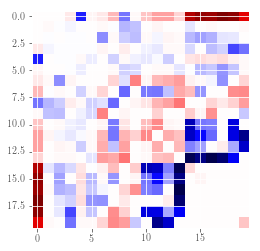

In [299]:
norm = MidPointNorm(midpoint=0)

plt.imshow(coefs, cmap='seismic', norm=norm)
plt.show()

In [306]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Lasso(alpha=1e-3), Xp, y, scoring='r2', cv=5, verbose=True)

In [307]:
print(np.mean(scores))

0.415715432622


In [309]:
lr = Lasso(alpha=1e-3, max_iter=20000)
lr.fit(Xp, y)
y_pred = lr.predict(Xp)

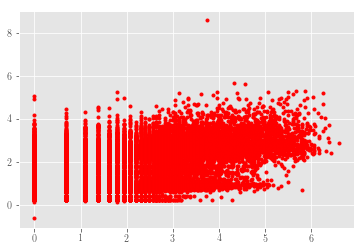

In [310]:
plt.plot(y, y_pred, 'r.')
plt.show()